# [실습-퀴즈] Python을 활용한 AI 모델링 - 딥러닝 파트
+ Python을 활용한 AI 모델링에서 딥러닝에 대해 실습해 보겠습니다.
+ 여기서는 딥러닝 모델 DNN에 대해 코딩하여 모델 구축해 보겠습니다.
+ 한가지 당부 드리고 싶은 말은 "백문이불여일타" 입니다.
+ 이론보다 실습이 더 많은 시간과 노력이 투자 되어야 합니다.

## 학습목차
1. 딥러닝 심층신경망(DNN) 모델 프로세스
 - 데이터 가져오기
 - 데이터 전처리
 - Train, Test 데이터셋 분할
 - 데이터 정규화
 - DNN 딥러닝 모델
2. 재현율 성능이 좋지 않다. 어떻게 성능향상 할수 있나?

#  
# 1. 딥러닝 심층신경망(DNN) 모델 프로세스
① 라이브러리 임포트(import)  
② 데이터 가져오기(Loading the data)  
③ 탐색적 데이터 분석(Exploratory Data Analysis)  
④ 데이터 전처리(Data PreProcessing) : 데이터타입 변환, Null 데이터 처리, 누락데이터 처리,
더미특성 생성, 특성 추출 (feature engineering) 등  
⑤ Train, Test  데이터셋 분할  
⑥ 데이터 정규화(Normalizing the Data)  
⑦ 모델 개발(Creating the Model)  
⑧ 모델 성능 평가

## ① 라이브러리 임포트

##### 필요 라이브러리 임포트

In [1]:
# 기본적으로 필요한 numpy, pandas, matplotlib 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib as plt




## ② 데이터 로드

#### Python활용AI모델링_01.데이터전처리 단계에서 처리 후 저장한 data_save.csv 파일 다운로드하기

In [2]:
!gdown 1_OYD8w8S6k26eecrBBVU7Kf8qG-GHHsS

'gdown'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


##### <font color=blue> **[문제] 같은 폴더내에 있는 data_save.csv 파일을 Pandas read_csv 함수를 이용하여 읽어 df 변수에 저장하세요.** </font>

In [3]:
# 읽어 들일 파일명 : data_save.csv
# Pandas read_csv 함수 활용
# 결과 : df 저장
pd.read_csv("data_v1_save.csv")

df = pd.read_csv("data_v1_save.csv")
df

,gender,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,No,No,34,No,DSL,Yes,No,No,No,No,One year,No,Mailed check,56.95,1889.50,0
1,Male,No,No,2,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
2,Male,No,No,45,No phone service,DSL,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
3,Female,No,No,2,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
4,Female,No,No,8,Yes,Fiber optic,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,Female,No,No,72,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0
7023,Male,Yes,Yes,24,Yes,DSL,Yes,No,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7024,Female,Yes,Yes,72,Yes,Fiber optic,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7025,Female,Yes,Yes,11,No phone service,DSL,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0


## ③ 데이터 분석

In [4]:
# 불러온 데이터프레임에 대한 형태, 타입, null 한번에 확인하기
# 17컬럼, 7,027 라인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7027 non-null   object 
 1   Partner           7027 non-null   object 
 2   Dependents        7027 non-null   object 
 3   tenure            7027 non-null   int64  
 4   MultipleLines     7027 non-null   object 
 5   InternetService   7027 non-null   object 
 6   OnlineSecurity    7027 non-null   object 
 7   OnlineBackup      7027 non-null   object 
 8   TechSupport       7027 non-null   object 
 9   StreamingTV       7027 non-null   object 
 10  StreamingMovies   7027 non-null   object 
 11  Contract          7027 non-null   object 
 12  PaperlessBilling  7027 non-null   object 
 13  PaymentMethod     7027 non-null   object 
 14  MonthlyCharges    7027 non-null   float64
 15  TotalCharges      7027 non-null   float64
 16  Churn             7027 non-null   int64  


In [5]:
# 읽어 들인 데이터 프레임의 뒤 5개 확인하기


df.head(5)

,gender,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,No,No,34,No,DSL,Yes,No,No,No,No,One year,No,Mailed check,56.95,1889.50,0
1,Male,No,No,2,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
2,Male,No,No,45,No phone service,DSL,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
3,Female,No,No,2,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
4,Female,No,No,8,Yes,Fiber optic,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1


<AxesSubplot:>

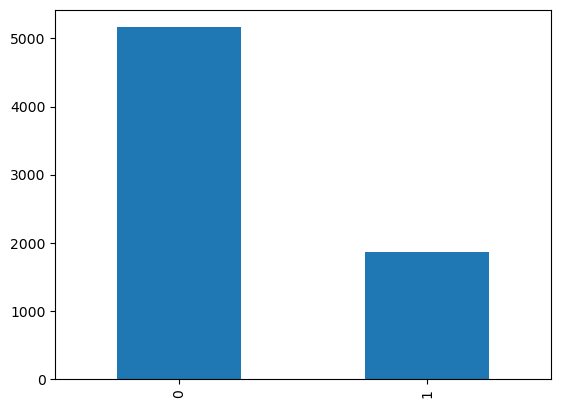

In [6]:
df['Churn'].value_counts().plot(kind='bar')

## ④ 데이터 전처리

+ 모든 데이터값들은 숫자형으로 되어야 한다. 즉, Ojbect 타입을 모든 숫자형 변경 필요
+ Object 컬럼에 대해 Pandas get_dummies 함수 활용하여 One-Hot-Encoding

In [7]:
# 1. 판다스 select_dtypes 함수 이용해서 Object 컬럼명 수집하고 cal_cols 저장하기
# 2. cal_cols 내용 보여주기
df[['MultipleLines']].head()
df['MultipleLines'].value_counts()
pd.get_dummies(data=df, columns=['MultipleLines'])


,gender,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,Male,No,No,34,DSL,Yes,No,No,No,No,One year,No,Mailed check,56.95,1889.50,0,1,0,0
1,Male,No,No,2,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1,0,0
2,Male,No,No,45,DSL,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0,1,0
3,Female,No,No,2,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1,0,0
4,Female,No,No,8,Fiber optic,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,Female,No,No,72,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0,1,0,0
7023,Male,Yes,Yes,24,DSL,Yes,No,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,0,0,1
7024,Female,Yes,Yes,72,Fiber optic,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,0,0,1
7025,Female,Yes,Yes,11,DSL,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,0,1,0


In [8]:
cal_cols = df.select_dtypes('object').columns.values
cal_cols

array(['gender', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'], dtype=object)

##### <font color=blue> **[문제] Object 컬럼에 대해 One-Hot-Encoding 수행하고 그 결과를 df1 변수에 저장하세요.** </font>

In [9]:
# Pandas get_dummies() 함수 이용
# 원-핫-인코딩 결과를 df1 저장


df1 = pd.get_dummies(data=df, columns=cal_cols)

In [10]:
# 판다스 info함수 이용하기
# 40컬럼, 7,027 라인

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7027 non-null   int64  
 1   MonthlyCharges                           7027 non-null   float64
 2   TotalCharges                             7027 non-null   float64
 3   Churn                                    7027 non-null   int64  
 4   gender_Female                            7027 non-null   uint8  
 5   gender_Male                              7027 non-null   uint8  
 6   Partner_No                               7027 non-null   uint8  
 7   Partner_Yes                              7027 non-null   uint8  
 8   Dependents_No                            7027 non-null   uint8  
 9   Dependents_Yes                           7027 non-null   uint8  
 10  MultipleLines_No                         7027 no

In [11]:
X = df1.drop('Churn', axis=1).values
y = df1['Churn'].values
X.shape, y.shape

((7027, 39), (7027,))

## ⑤ Train, Test  데이터셋 분할

In [12]:
# train_test_split 패키지 가져오기

from sklearn.model_selection import train_test_split

In [13]:
# X, y 분리
# X : drop 함수 활용하여 'Churn' 컬럼 삭제한 나머지 데이터의 values만
# y : 'Churn' 컬럼 데이터의 values만
# X.shape, y.shape 출력해 보자

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)


In [14]:
# train_test_split 함수 이용해서 X, y 에 대해 Train , Test 데이터셋 나누기
# 결과 : X_train, X_test, y_train, y_test
# 옵션 : test_size=0.3, stratify=y, random_state=42




In [15]:
# X_train shape 확인



In [16]:
# y_train shape 확인



## ⑥ 데이터 정규화/스케일링(Normalizing/Scaling)

In [17]:
# 데이터 프레임 뒤 5개 보고 숫자 분포 이루어진 컬럼들의 크기 확인
# tenure, MonthlyCharges,	TotalCharges 컬럼 값들의 크기가 다름을 확인해봅니다

df1.tail()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
7022,72,21.15,1419.40,0,1,0,1,0,1,0,...,0,0,0,1,0,1,1,0,0,0
7023,24,84.80,1990.50,0,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7024,72,103.20,7362.90,0,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7025,11,29.60,346.45,0,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7026,4,74.40,306.60,1,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [18]:
# MinMaxScaler 함수 임포트(sklearn.preprocessing 모듈 하위에 있음)

from sklearn.preprocessing import MinMaxScaler

In [19]:
# 1. MinMaxScaler 정의하고 scaler 저장하기
# 2. scaler의 fit_transform 함수로 X_train 데이터 적용후 X_train에 저장하기
# 3. scaler의 transform 함수로 X_test 데이터 적용 후 X_test 저장하기
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
# 잘 스케일 적용되었는지 X_train 데이터 2개만 보기

X_train[:2], y_train[:2]

(array([[0.65277778, 0.56851021, 0.40877722, 1.        , 0.        ,
         1.        , 0.        , 1.        , 0.        , 1.        ,
         0.        , 0.        , 0.        , 1.        , 0.        ,
         0.        , 0.        , 1.        , 1.        , 0.        ,
         0.        , 1.        , 0.        , 0.        , 1.        ,
         0.        , 0.        , 1.        , 0.        , 0.        ,
         1.        , 0.        , 0.        , 1.        , 0.        ,
         0.        , 1.        , 0.        , 0.        ],
        [0.27777778, 0.00498256, 0.04008671, 1.        , 0.        ,
         1.        , 0.        , 1.        , 0.        , 1.        ,
         0.        , 0.        , 0.        , 0.        , 1.        ,
         0.        , 1.        , 0.        , 0.        , 1.        ,
         0.        , 0.        , 1.        , 0.        , 0.        ,
         1.        , 0.        , 0.        , 1.        , 0.        ,
         1.        , 0.        , 0.        , 

## ⑦ 딥러닝 심층신경망(DNN) 모델 구현

####  
### 라이브러리 임포트

In [21]:
# 필요한 라이브러리 임포트 하기

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

tf.random.set_seed(100)

####  
### 하이퍼파라미터 설정 : batch_size, epochs

In [22]:
batch_size = 16
epochs = 20

####  
### 모델 입력(features) 갯수 확인

In [23]:
# X_train shape 확인

X_train.shape

(4918, 39)

####  
### 모델 출력(label) 갯수 확인

In [24]:
# y_train shape 확인

y_train.shape

(4918,)

####  
### A. 이진분류 DNN모델 구성

![hidden Layer](https://github.com/gzone2000/TEMP_TEST/raw/master/hidden_layer1.PNG)
+ [출처] https://subscription.packtpub.com/book/data/9781788995207/1/ch01lvl1sec03/deep-learning-intuition

In [25]:
from keras.models import Sequential
from keras.layers import Dense  

##### <font color=blue> **[문제] 요구사항대로 Sequential 모델을 만들어 보세요.** </font>

In [26]:
# Sequential() 모델 정의 하고 model로 저장
# input layer는 input_shape=() 옵션을 사용한다.
# 39개 input
# unit 4개 hidden layer
# unit 3개 hidden layer
# 1개 output layser : 이진분류
# 신경망 모델을 초기화

model = Sequential()

# n1개의 노드가 있는 첫 번째 은닉 레이어를 추가합니다. (4개)
# Input_dim은 x_values 또는 입력 레이어의 수/특성 수를 나타냅니다.
# activation은 노드/뉴런이 활성화되는 방식을 나타냅니다. 우리는 relu를 사용할 것입니다. 다른 일반적인 활성화 방식은'sigmoid' 및 'tanh'입니다.
model.add(Dense(4, input_shape=(39,), activation='relu')) # 인공신경망 1번째 층

# n2개의 노드가 있는 두 번째 은닉 레이어를 추가합니다. (3개)
model.add(Dense(3, activation='relu')) # 인공신경망 2번째 층

# n3개의 노드가 있는 출력 레이어를 추가합니다. (!개)
# 사용된 activation은 'softmax'입니다. Softmax는 범주형 출력 또는 대상을 처리할 때 사용됩니다.
model.add(Dense(1,activation='sigmoid')) # 인공신경망 3번째 층

# 모델을 컴파일합니다. optimizer는 모델 내에서 조정하는 방법을 의미합니다. loss은 예측된 출력과 실제 출력 간의 차이를 나타냅니다.
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) 





####  
### 모델 확인

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 160       
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 179 (716.00 Byte)
Trainable params: 179 (716.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


####  
### 모델 구성 -  과적합 방지

![dropout](https://github.com/gzone2000/TEMP_TEST/raw/master/dropout.PNG)
+ [출처] https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5

In [28]:
# Sequential() 모델 정의 하고 model로 저장
# input layer는 input_shape=() 옵션을 사용한다.
# 39개 input
# unit 4개 hidden layer
# dropout layer추가 : 0.3 비율 입력 => Dropout(0.3)
# unit 3개 hidden layer
# dropout layer추가 : 0.3 비율 입력
# 1개 output layser : 이진분류(sigmoid)


model.add(Dense(4, input_shape=(39,), activation='relu')) # 인공신경망 1번째 층
model.add(Dropout(0.3))  # Dropout 레이어 추가

model.add(Dense(3, activation='relu')) # 인공신경망 2번째 층
model.add(Dropout(0.3))  # Dropout 레이어 추가

# 출력 레이어
model.add(Dense(1, activation='sigmoid')) # 인공신경망 3번째 층 (이진 분류이므로 'sigmoid'를 사용)

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



####  
### 과적합 방지 모델 확인

In [29]:
# 정의된 DNN 모델의 summary 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 160       
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
 dense_3 (Dense)             (None, 4)                 8         
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_4 (Dense)             (None, 3)                 15        
                                                                 
 dropout_1 (Dropout)         (None, 3)                 0

####  
### 모델 컴파일 – 이진 분류 모델

In [30]:
# 모델 컴파일(compile)
# 옵션 : optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']




- 모델 컴파일 – 다중 분류 모델 (Y값을 One-Hot-Encoding 한경우) <br>
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

- 모델 컴파일 – 다중 분류 모델  (Y값을 One-Hot-Encoding 하지 않은 경우) <br>
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

- 모델 컴파일 – 예측 모델
model.compile(optimizer='adam', loss='mse')

####  
### 모델 학습

##### <font color=blue> **[문제] 요구사항대로 DNN 모델을 학습시키세요.** </font>
+ 모델 이름 : model
+ epoch : 10번
+ batch_size : 10번

In [31]:
# 앞쪽에서 정의된 모델 이름 : model
# Sequential 모델의 fit() 함수 사용
# @인자
### X, y : X_train, y_train
### validation_data=(X_test, y_test)
### epochs 10번
### batch_size 10번




model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10)

Epoch 1/10
492/492 [==============================] - 1s 1ms/step - loss: 0.6662 - accuracy: 0.6830 - val_loss: 0.6259 - val_accuracy: 0.7345
Epoch 2/10
492/492 [==============================] - 1s 1ms/step - loss: 0.6087 - accuracy: 0.7344 - val_loss: 0.5959 - val_accuracy: 0.7345
Epoch 3/10
492/492 [==============================] - 1s 1ms/step - loss: 0.5891 - accuracy: 0.7344 - val_loss: 0.5844 - val_accuracy: 0.7345
Epoch 4/10
492/492 [==============================] - 1s 1ms/step - loss: 0.5820 - accuracy: 0.7344 - val_loss: 0.5804 - val_accuracy: 0.7345
Epoch 5/10
492/492 [==============================] - 1s 2ms/step - loss: 0.5797 - accuracy: 0.7344 - val_loss: 0.5792 - val_accuracy: 0.7345
Epoch 6/10
492/492 [==============================] - 1s 3ms/step - loss: 0.5791 - accuracy: 0.7344 - val_loss: 0.5789 - val_accuracy: 0.7345
Epoch 7/10
492/492 [==============================] - 1s 3ms/step - loss: 0.5789 - accuracy: 0.7344 - val_loss: 0.5788 - val_accuracy: 0.7345
Epoch 

####  
### B. 다중 분류 DNN 구성
+ 39개 input
+ unit 5개 hidden layer
+ dropout
+ unit 4개 hidden layer
+ dropout
+ 2개 output layser : 이진분류

![다중분류](https://github.com/gzone2000/TEMP_TEST/raw/master/hidden_layer2.PNG)
+ [출처] https://www.educba.com/dnn-neural-network/

In [32]:
# Sequential() 모델 정의 하고 model로 저장
# input layer는 input_shape=() 옵션을 사용한다.
# 39개 input
# unit 5개 hidden layer
# dropout layer추가 : 0.3 비율 입력
# unit 4개 hidden layer
# dropout layer추가 : 0.3 비율 입력
# 2개 output layser : 다중분류(softmax)

model = Sequential()

# n1개의 노드가 있는 첫 번째 은닉 레이어를 추가합니다. (4개)
# Input_dim은 x_values 또는 입력 레이어의 수/특성 수를 나타냅니다.
# activation은 노드/뉴런이 활성화되는 방식을 나타냅니다. 우리는 relu를 사용할 것입니다. 다른 일반적인 활성화 방식은'sigmoid' 및 'tanh'입니다.
model.add(Dense(5, input_shape=(39,), activation='relu')) # 인공신경망 1번째 층
model.add(Dropout(0.3))  # Dropout 레이어 추가

# n2개의 노드가 있는 두 번째 은닉 레이어를 추가합니다. (3개)
model.add(Dense(4, activation='relu')) # 인공신경망 2번째 층
model.add(Dropout(0.3))  # Dropout 레이어 추가

# n3개의 노드가 있는 출력 레이어를 추가합니다. (!개)
# 사용된 activation은 'softmax'입니다. Softmax는 범주형 출력 또는 대상을 처리할 때 사용됩니다.
model.add(Dense(2,activation='softmax')) # 인공신경망 3번째 층

# 모델을 컴파일합니다. optimizer는 모델 내에서 조정하는 방법을 의미합니다. loss은 예측된 출력과 실제 출력 간의 차이를 나타냅니다.
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) 





####  
### 모델 확인

In [33]:
# 정의된 DNN 모델의 summary 확인

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 200       
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
 dense_7 (Dense)             (None, 4)                 24        
                                                                 
 dropout_3 (Dropout)         (None, 4)                 0         
                                                                 
 dense_8 (Dense)             (None, 2)                 10        
                                                                 
Total params: 234 (936.00 Byte)
Trainable params: 234 (936.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 200       
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
 dense_7 (Dense)             (None, 4)                 24        
                                                                 
 dropout_3 (Dropout)         (None, 4)                 0         
                                                                 
 dense_8 (Dense)             (None, 2)                 10        
                                                                 
Total params: 234 (936.00 Byte)
Trainable params: 234 (936.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


####  
### 모델 컴파일 – 다중 분류 모델

In [35]:
# 모델 컴파일(compile)
# 옵션 : optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy']


model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) 


####  
### 모델 학습

In [36]:
# 정의된 모델 이름 : model
# Sequential 모델의 fit() 함수 사용
# @인자
### X, y : X_train, y_train
### validation_data=(X_test, y_test)
### epochs 20번
### batch_size 16번
### history 변수에 결과 저장




history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=16)

Epoch 1/20
308/308 [==============================] - 2s 3ms/step - loss: 0.6262 - accuracy: 0.6726 - val_loss: 0.5404 - val_accuracy: 0.7345
Epoch 2/20
308/308 [==============================] - 1s 2ms/step - loss: 0.5498 - accuracy: 0.7314 - val_loss: 0.4992 - val_accuracy: 0.7340
Epoch 3/20
308/308 [==============================] - 1s 3ms/step - loss: 0.5185 - accuracy: 0.7385 - val_loss: 0.4710 - val_accuracy: 0.7340
Epoch 4/20
308/308 [==============================] - 1s 2ms/step - loss: 0.5085 - accuracy: 0.7532 - val_loss: 0.4642 - val_accuracy: 0.7340
Epoch 5/20
308/308 [==============================] - 1s 2ms/step - loss: 0.4952 - accuracy: 0.7523 - val_loss: 0.4516 - val_accuracy: 0.7421
Epoch 6/20
308/308 [==============================] - 1s 2ms/step - loss: 0.4936 - accuracy: 0.7584 - val_loss: 0.4518 - val_accuracy: 0.7515
Epoch 7/20
308/308 [==============================] - 1s 2ms/step - loss: 0.4880 - accuracy: 0.7523 - val_loss: 0.4469 - val_accuracy: 0.7392
Epoch 

####  
### Callback : 조기종료, 모델 저장

In [37]:
# EarlyStopping, ModelCheckpoint 불러오기

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint # Epoch기 100이더라도 정확도 향상이 없다면 조기종료

In [38]:
# EarlyStopping 함수 이용해서 val_loss 모니터링해서 성능이 5번 지나도록 좋아지지 않으면 조기 종료
# 옵션 : monitor='val_loss', patience=5, verbose=1
# 결과를 early_stop에 저장

early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=16, callbacks=[early_stop])

Epoch 1/20
308/308 [==============================] - 1s 2ms/step - loss: 0.4672 - accuracy: 0.7729 - val_loss: 0.4297 - val_accuracy: 0.7923
Epoch 2/20
308/308 [==============================] - 1s 2ms/step - loss: 0.4681 - accuracy: 0.7715 - val_loss: 0.4267 - val_accuracy: 0.7990
Epoch 3/20
308/308 [==============================] - 1s 2ms/step - loss: 0.4678 - accuracy: 0.7662 - val_loss: 0.4308 - val_accuracy: 0.7843
Epoch 4/20
308/308 [==============================] - 1s 2ms/step - loss: 0.4715 - accuracy: 0.7631 - val_loss: 0.4286 - val_accuracy: 0.7833
Epoch 5/20
308/308 [==============================] - 1s 3ms/step - loss: 0.4608 - accuracy: 0.7729 - val_loss: 0.4271 - val_accuracy: 0.7895
Epoch 6/20
308/308 [==============================] - 1s 2ms/step - loss: 0.4697 - accuracy: 0.7702 - val_loss: 0.4274 - val_accuracy: 0.7914
Epoch 7/20
308/308 [==============================] - 1s 3ms/step - loss: 0.4663 - accuracy: 0.7690 - val_loss: 0.4297 - val_accuracy: 0.7795
Epoch 

In [39]:
# ModelCheckpoint 함수 이용해서 val_loss 가장 낮은 값을 가질때마다 모델을 best_model.h5 파일에 저장
# 옵션 : filepath='best_model.h5', monitor='val_loss', save_best_only=True, verbose=1
# 결과를 check_point에 저장

check_point = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

# 모델 학습할 때 콜백 함수를 사용
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=16, callbacks=[early_stop, check_point])


Epoch 1/20
290/308 [===========================>..] - ETA: 0s - loss: 0.4691 - accuracy: 0.7741
Epoch 1: val_loss improved from inf to 0.43429, saving model to best_model.h5
308/308 [==============================] - 1s 3ms/step - loss: 0.4732 - accuracy: 0.7708 - val_loss: 0.4343 - val_accuracy: 0.7795
Epoch 2/20
 37/308 [==>...........................] - ETA: 0s - loss: 0.4944 - accuracy: 0.7736

C:\Users\isfs0\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


286/308 [==========================>...] - ETA: 0s - loss: 0.4670 - accuracy: 0.7694
Epoch 2: val_loss improved from 0.43429 to 0.42715, saving model to best_model.h5
308/308 [==============================] - 1s 3ms/step - loss: 0.4643 - accuracy: 0.7715 - val_loss: 0.4271 - val_accuracy: 0.7866
Epoch 3/20
296/308 [===========================>..] - ETA: 0s - loss: 0.4656 - accuracy: 0.7715
Epoch 3: val_loss did not improve from 0.42715
308/308 [==============================] - 1s 3ms/step - loss: 0.4653 - accuracy: 0.7725 - val_loss: 0.4279 - val_accuracy: 0.7909
Epoch 4/20
307/308 [============================>.] - ETA: 0s - loss: 0.4633 - accuracy: 0.7675
Epoch 4: val_loss did not improve from 0.42715
308/308 [==============================] - 1s 3ms/step - loss: 0.4634 - accuracy: 0.7676 - val_loss: 0.4288 - val_accuracy: 0.7838
Epoch 5/20
286/308 [==========================>...] - ETA: 0s - loss: 0.4704 - accuracy: 0.7660
Epoch 5: val_loss improved from 0.42715 to 0.42670, saving

####  
### 모델 학습

In [40]:
# 정의된 모델 이름 : model
# Sequential 모델의 fit() 함수 사용
# @인자
### X, y : X_train, y_train
### validation_data=(X_test, y_test)
### epochs 50번
### batch_size 20번
### callbacks에 위에서 정의된 early_stop, check_point 변수 넣기
### history 변수에 결과 저장

early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
check_point = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=20, callbacks=[early_stop, check_point])


Epoch 1/50
243/246 [============================>.] - ETA: 0s - loss: 0.4653 - accuracy: 0.7693
Epoch 1: val_loss improved from inf to 0.42935, saving model to best_model.h5
246/246 [==============================] - 1s 2ms/step - loss: 0.4650 - accuracy: 0.7698 - val_loss: 0.4293 - val_accuracy: 0.7828
Epoch 2/50
246/246 [==============================] - ETA: 0s - loss: 0.4615 - accuracy: 0.7686
Epoch 2: val_loss improved from 0.42935 to 0.42892, saving model to best_model.h5
246/246 [==============================] - 1s 3ms/step - loss: 0.4615 - accuracy: 0.7686 - val_loss: 0.4289 - val_accuracy: 0.7809
Epoch 3/50
244/246 [============================>.] - ETA: 0s - loss: 0.4614 - accuracy: 0.7691
Epoch 3: val_loss improved from 0.42892 to 0.42571, saving model to best_model.h5
246/246 [==============================] - 1s 3ms/step - loss: 0.4607 - accuracy: 0.7694 - val_loss: 0.4257 - val_accuracy: 0.7904
Epoch 4/50
224/246 [==========================>...] - ETA: 0s - loss: 0.4681 

In [41]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
check_point = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=20, callbacks=[early_stop, check_point])


Epoch 1/50
246/246 [==============================] - ETA: 0s - loss: 0.4630 - accuracy: 0.7678
Epoch 1: val_loss improved from inf to 0.42985, saving model to best_model.h5
246/246 [==============================] - 1s 3ms/step - loss: 0.4630 - accuracy: 0.7678 - val_loss: 0.4298 - val_accuracy: 0.7890
Epoch 2/50
228/246 [==========================>...] - ETA: 0s - loss: 0.4674 - accuracy: 0.7651
Epoch 2: val_loss improved from 0.42985 to 0.42678, saving model to best_model.h5
246/246 [==============================] - 1s 3ms/step - loss: 0.4657 - accuracy: 0.7672 - val_loss: 0.4268 - val_accuracy: 0.7871
Epoch 3/50
218/246 [=========================>....] - ETA: 0s - loss: 0.4736 - accuracy: 0.7599
Epoch 3: val_loss did not improve from 0.42678
246/246 [==============================] - 1s 3ms/step - loss: 0.4705 - accuracy: 0.7631 - val_loss: 0.4315 - val_accuracy: 0.7833
Epoch 4/50
227/246 [==========================>...] - ETA: 0s - loss: 0.4683 - accuracy: 0.7639
Epoch 4: val_los

####  
## ⑧ 모델 성능 평가

In [42]:
# 모델 성능정보(history.history)를 DataFrame에 넣고 losses에 저장하기

losses = pd.DataFrame(history.history)


In [43]:
# losses 데이터프레임 앞 5개 보기

losses.head()


,loss,accuracy,val_loss,val_accuracy
0,0.463010,0.767792,0.429846,0.788999
1,0.465734,0.767182,0.426780,0.787103
2,0.470473,0.763115,0.431455,0.783310
3,0.465607,0.764742,0.428704,0.782361
4,0.461486,0.767588,0.428905,0.784732


### 성능 시각화

<AxesSubplot:>

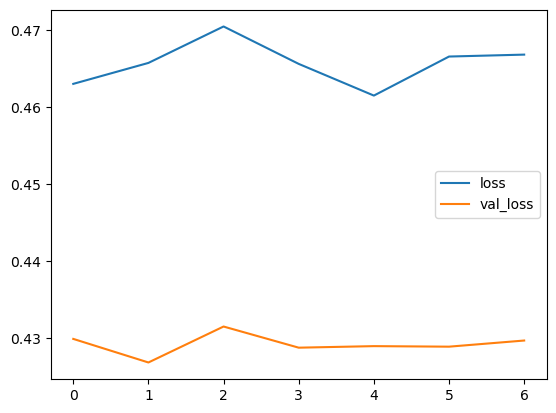

In [44]:
# 판다스 plot 함수로 그래프 그리기

losses[['loss','val_loss']].plot()

<AxesSubplot:>

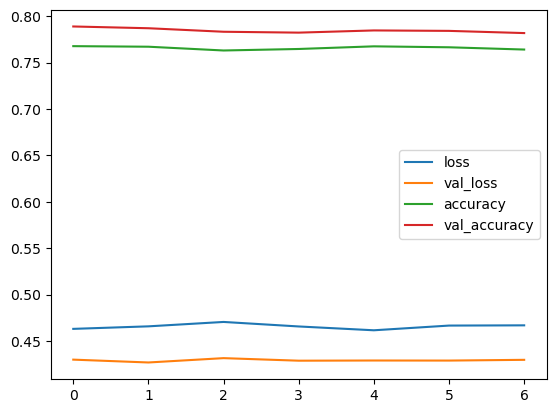

In [45]:
# 판다스 plot 함수로 그래프 그리기

losses[['loss','val_loss', 'accuracy','val_accuracy']].plot()

<AxesSubplot:>

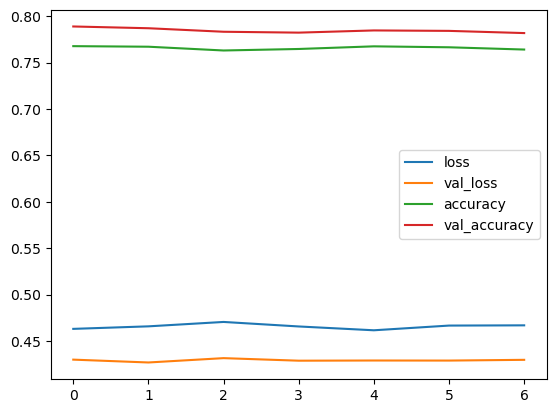

In [46]:
losses[['loss','val_loss', 'accuracy','val_accuracy']].plot()

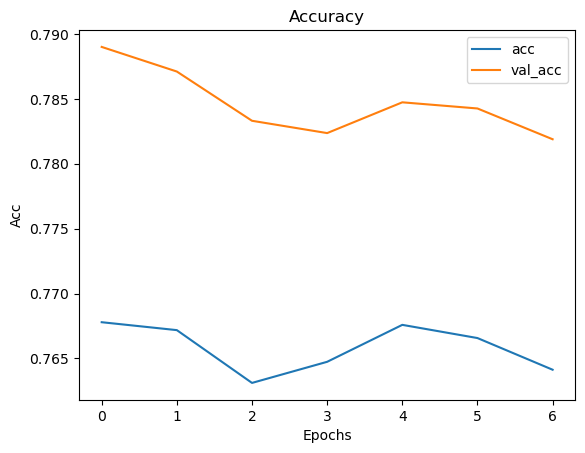

In [48]:
# matplotlib 이용해서 그래프 그리기
# history.history['accuracy'], history.history['val_accuracy'] 2개 라인 그래프 그리기
# title : 'Accuracy'
# xlabel : 'Epochs'
# ylabel : 'Acc'
# legend : ['acc', 'val_acc']
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'])
plt.show()


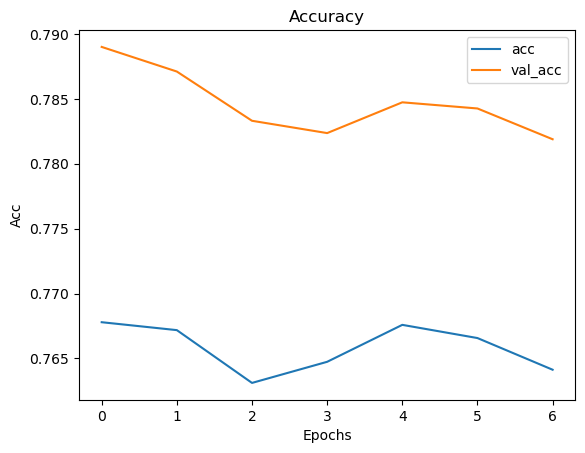

In [49]:
#import matplotlib as plt --> atplotlib의 plot 함수는 pyplot 모듈에서 제공됩니다. 따라서 코드에서 Matplotlib를 올바르게 불러와야 함
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'])
plt.show()


### 성능 평가

In [50]:
# 분류 성능평가 지표 불러오기

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [51]:
# DNN 모델으로 예측하기

pred = model.predict(X_test)



66/66 [==============================] - 0s 1ms/step


In [52]:
# 예측 결과 shape 확인
pred.shape

(2109, 2)

In [53]:
# 다중분류로 분류된 것들중에서 제일 큰값의 인덱스 가져오기

import numpy as np

y_pred = np.argmax(pred, axis=1)

y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [54]:
# 정확도 80%
accuracy_score(y_test, y_pred)

0.781887150308203

In [55]:
# 재현율 성능이 좋지 않다
recall_score(y_test, y_pred)

0.24285714285714285

In [56]:
# accuracy, recall, precision 성능 한번에 보기

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      1549
           1       0.79      0.24      0.37       560

    accuracy                           0.78      2109
   macro avg       0.79      0.61      0.62      2109
weighted avg       0.78      0.78      0.74      2109



#  
# 2. 재현율 성능이 좋지 않다. 어떻게 성능향상 할수 있나?
+ 성능향상 할수 있는 방법은 여러가지 있습니다.
+ DNN 하이퍼 파라미터 수정하면서 성능향상이 되는지 확인
+ 데이터 줄이거나 늘리거나, Feature(컬럼)을 늘리거나 줄이거나 하는 식의 Feature Engineering 방법

####  
## Feature Engineering 통한 성능향상
+ 불균현 Churn 데이터 균형 맞추기 : OverSampling, UnderSampling
+ OverSampling 기법 : SMOTE(Synthetic Minority Over-sampling Technique)
+ 참조사이트 : https://datascienceschool.net/03%20machine%20learning/14.02%20%EB%B9%84%EB%8C%80%EC%B9%AD%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%AC%B8%EC%A0%9C.html

![SMOTE](https://github.com/gzone2000/TEMP_TEST/raw/master/SMOTE.png)

### imbalanced-learn 패키지 설치
+ imbalanced data 문제를 해결하기 위한 다양한 샘플링 방법을 구현한 파이썬 패키지

In [ ]:
# 필요한 패키지 설치하기

# !pip uninstall -U imbalanced-learn
# !pip uninstall -U scikit-learn
# !pip install -U scikit-learn imbalanced-learn

####  
### SMOTE 함수 이용하여 Oversampling

In [ ]:
!pip install SMOTE

In [57]:
# 필요한 라이브러리 불러오기

from imblearn.over_sampling import SMOTE


In [59]:
!pip install threadpoolctl

In [64]:
# SMOTE 함수 정의 및 Oversampling 수행

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

AttributeError: 'NoneType' object has no attribute 'split'

In [62]:
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (4918, 39) (4918,)


NameError: name 'X_train_over' is not defined

In [63]:
# SMOTE 적용 후 레이블 값 분포 : 0과 1 갯수가 동일
pd.Series(y_train_over).value_counts()

NameError: name 'y_train_over' is not defined

####  
### 데이터 정규화

In [61]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_over = scaler.transform(X_train_over)
X_test = scaler.transform(X_test)

NameError: name 'X_train_over' is not defined

In [ ]:
X_train_over.shape, y_train_over.shape, X_test.shape, y_test.shape

####  
### 모델 개발(Creating the Model)

In [ ]:
# Sequential() 모델 정의 하고 model로 저장
# input layer는 input_shape=() 옵션을 사용한다.
# 39개 input
# unit 64개 hidden layer
# dropout layer추가 : 0.3 비율 입력
# unit 32개 hidden layer
# dropout layer추가 : 0.3 비율 입력
# unit 16개 hidden layer
# dropout layer추가 : 0.3 비율 입력
# 2개 output layser : 다중분류(softmax)









In [ ]:
# 모델 컴파일
# 옵션 : optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']






In [ ]:
# EarlyStopping 함수 이용해서 val_accuracy 모니터링해서 5번이상 성능이 좋아지지 않으면 조기 종료 하게 함.
# 옵션 : monitor='val_accuracy', mode='max', patience=5, verbose=1
# 결과를 early_stop에 저장




In [ ]:
# ModelCheckpoint 함수 이용해서 val_loss 가장 낮은 값을 가질때마다 모델을 best_model.h5 파일에 저장
# 옵션 : monitor='val_loss', save_best_only=True, mode='min', verbose=1
# 결과를 check_point에 저장




In [ ]:
# 정의된 모델 이름 : model
# Sequential 모델의 fit() 함수 사용
# @인자
### X, y : X_train_over, y_train_over
### validation_data=(X_test, y_test)
### verbose=1
### epochs 50번
### batch_size 32번
### callbacks에 위에서 정의된 early_stop, check_point 변수 넣기
### history 변수에 결과 저장







####  
### 모델 성능 평가

In [65]:
losses = pd.DataFrame(model.history.history)

In [66]:
losses.head()

""


#### 성능 시각화

In [67]:
losses[['loss','val_loss']].plot()

KeyError: "None of [Index(['loss', 'val_loss'], dtype='object')] are in the [columns]"

In [ ]:
losses[['loss','val_loss', 'accuracy','val_accuracy']].plot()

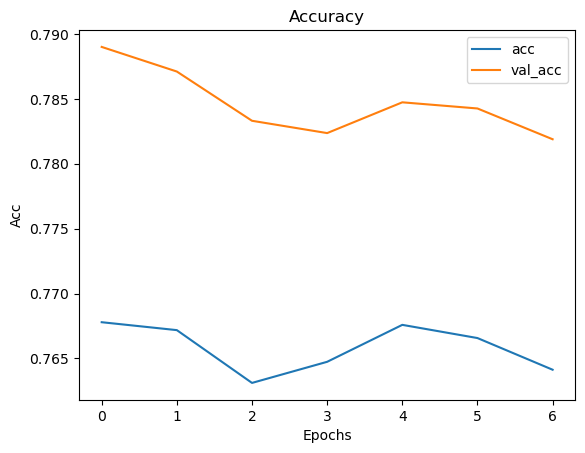

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'])
plt.show()

#### 성능 평가

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [ ]:
pred = model.predict(X_test)

In [ ]:
pred.shape

In [ ]:
# 다중분류로 분류된 것들중에서 제일 큰값의 인덱스 가져오기



In [ ]:
# 정확도 70~80%


In [ ]:
# 재현율 70% 정도로 이전보다 좋아졌다.


In [ ]:
# recall 성능을 올렸지만, 반대급부로 precision 성능은 떨어진다.
# accuracy, recall, precision 어떤것에 집중할지 선택하는것도 필요하다.



###  
## 배운 내용 정리
1. 딥러닝 심층신경망(DNN) 모델 프로세스
 + 데이터 가져오기
 + 데이터 전처리
 + Train, Test 데이터셋 분할
 + 데이터 정규화
 + DNN 딥러닝 모델
2. 재현율 성능이 좋지 않다. 어떻게 성능향상 방법은?
 + Feature Engineering : 성능 잘 나올수 있도록 데이터 가공
 + 불균현 데이터 문제 해소 : under-sampling, over-sampling
 + Over-Sampling 기법 : SMOTE